# Ehrenfest Urn Model

The following analysis in based on the suggestions made by the question 5 of the [problem series](https://edisciplinas.usp.br/pluginfile.php/3983528/mod_resource/content/3/pgif2017_01.pdf) proposed by Silvio R. A. Salinas. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simple Simulation

We are going to simulate even a simpler situation, perhaps more realistic (why?). At each discrete time $t$, we pick a random number $0 \le r \lt 1$. If $r \lt N_1/N$, a ball is taken from the urn 1 and put in the urn 2, which simply means $ N_1 \rightarrow N_1 - 1$. On the other hand, if $r \ge N_1/N$, a ball is taken from the urn 2 and put in the urn 1, $N_1 \rightarrow N_1 + 1$. After that we consider the next discrete time $ t + \Delta  t$ and repeat the whole process during a convenient time interval in order to check the inherent statistical fluctuations and the path to a eventually equilibrium state as $t$ grows.

We choose $N_1 (t = 0) = N$ and analyze the behavior for different values of $N$.

### Case $N =20$

In [2]:
N = 20
t = np.arange(0,25*N, 5)

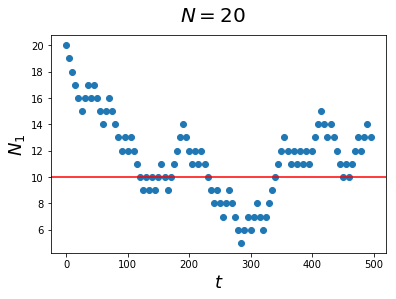

In [3]:
N1 = N
N1_array = [N1]

np.random.seed(12) 

for i in range(t.size-1):
    if (N1 > 0):
        r = np.random.random()
        if r < (N1/N):
            N1 = N1 - 1
        else:
            N1 = N1 + 1
        
        N1_array.append(N1)  
        
plt.plot(t[:len(N1_array)], N1_array,'o')
plt.ylabel('$N_1$', fontsize=18)
plt.xlabel('$t$', fontsize=18)
plt.suptitle('$N= %d$' % N, fontsize=20)
plt.axhline(y = N/2, color='r', linestyle='-')

plt.show()

### Case $N =200$

In [4]:
N = 200
t = np.arange(0, 15*N, 5)

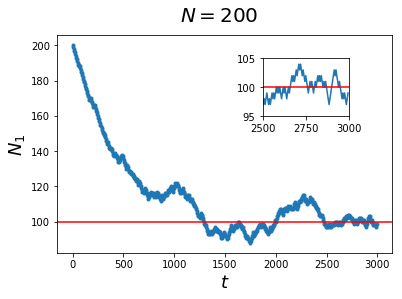

In [5]:
N1 = N
N1_array = [N1]

np.random.seed(12) 

for i in range(t.size-1):
    if (N1 > 0):
        r = np.random.random()
        if r < (N1/N):
            N1 = N1 - 1
        else:
            N1 = N1 + 1
        
        N1_array.append(N1)  
 

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(t[:len(N1_array)], N1_array,'.')
ax1.axhline(y = N/2, color='r', linestyle='-')
ax1.set_ylabel('$N_1$', fontsize=18)
ax1.set_xlabel('$t$', fontsize=18)

ax2.plot(t[:len(N1_array)], N1_array, marker='.', markersize=0.1)
ax2.axhline(y = N/2, color='r', linestyle='-')
ax2.set_xlim([2500,3000])
ax2.set_ylim([95,105])

plt.suptitle('$N= %d$' % N, fontsize=20)

plt.show()

### Case $N =2000$

In [6]:
N = 2000
t = np.arange(0, 10*N, 2)

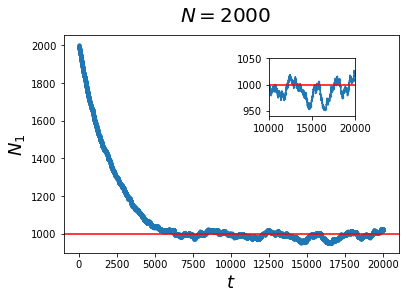

In [7]:
N1 = N
N1_array = [N1]

np.random.seed(12) 

for i in range(t.size-1):
    if (N1 > 0):
        r = np.random.random()
        if r < (N1/N):
            N1 = N1 - 1
        else:
            N1 = N1 + 1
        
        N1_array.append(N1)  
 

fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.6, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax1.plot(t[:len(N1_array)], N1_array,'.')
ax1.axhline(y = N/2, color='r', linestyle='-')
ax1.set_ylabel('$N_1$', fontsize=18)
ax1.set_xlabel('$t$', fontsize=18)

ax2.plot(t[:len(N1_array)], N1_array, marker='.', markersize=0.1)
ax2.axhline(y = N/2, color='r', linestyle='-')
ax2.set_xlim([10000,20000])
ax2.set_ylim([940,1050])

plt.suptitle('$N= %d$' % N, fontsize=20)

plt.show()

# Ehrenfest Urn Model as Markov Chain

The Ehrenfest Urn Model can be treated as Markov process, which is a random process whose future probabilities are determined by its most recent values. In our problem this means that the choice of which ball is going to be picked in the particular time $t$ depends only on the previous state of the system in the time $t + \Delta t$. 

In general, the temporal evolution of the probability distribution ${\cal P }(n,t)$ associated with a physical system in a particular state $n$ in the the time $t$ is given by the master equation:

$$ \frac{d}{dt} {\cal P }(n,t) = \sum_{m\ne n} \left[  W_{m \rightarrow n} {\cal P }(m,t) - 
                 W_{n \rightarrow m} {\cal P }(n,t) \right] $$
                 
Note that the transitional elements $ W_{i \rightarrow j} $ define a transitional matrix ${\cal W}$, with $\text{Tr}({\cal W}) = 0 $.

In our context, if we call ${\cal P }(N_1,t)$ the probability of finding $N_1$ balls in the urn 1 in the time $t$ and if we consider a Markov process the master equation is reduced to

$$ \frac{d}{dt} {\cal P }(N_1,t) =   W_{N_1 + 1 \rightarrow N_1} {\cal P }(N_1 + 1,t) 
                                     + W_{N_1 - 1 \rightarrow N_1} {\cal P }(N_1 - 1,t)
                                     - W_{N_1 \rightarrow N_1 + 1} {\cal P }(N_1,t)
                                     - W_{N_1 \rightarrow N_1 - 1 } {\cal P }(N_1,t)$$
                                     
with $N_1(t) + N_2(t) = N$ a constant value. Note that within the Markov assumption, this particular state with $N_1$ depends only on the states in the previous time $ t - \Delta t$, $(N_1 \pm 1 \rightarrow N_1)$ and $ t + \Delta t$, $(N_1 \rightarrow N_1 \pm 1)$.

### Transitional Matrix Elements

It is reasonable to define the transitional matrix elements as follows:

$$W_{N_1 + 1 \rightarrow N_1} \equiv \frac{N_1 + 1}{N},$$ 

for this quantity represents the transition where the urn 1 is taken from the state with $N_1 + 1$ balls to the state with $ N_1$ balls. It is equivalent to sort one of the $N_1 +1$ balls in the urn 1 among the total number of balls $N$.

$$W_{N_1 - 1 \rightarrow N_1} \equiv \frac{N-(N_1-1)}{N},$$

for this quantity represents the transition where the urn 1 is taken from the state with $N_1 - 1$ balls to the state with $ N_1$ balls. It is equivalent to sort one of the $N-(N_1-1)$ balls in the urn 2 among the total number of balls $N$. 

$$W_{N_1 \rightarrow N_1 + 1} \equiv \frac{N - N_1}{N},$$

for this quantity represents the transition where the urn 1 is taken from the state with $N_1$ balls to the state with $ N_1 + 1$ balls. It is equivalent to sort one of the $N-N_1$ balls in the urn 2 among the total number of balls $N$. Since this transition would take out the system from the state of interest with $N_1$ balls, it takes a negative sign in the master equation.  

$$ W_{N_1 \rightarrow N_1 - 1 } \equiv \frac{N_1}{N}, $$

for this quantity represents the transition where the urn 1 is taken from the state with $N_1$ balls to the state with $ N_1 - 1$ balls. It is equivalent to sort one of the $N_1$ balls in the urn 1 among the total number of balls $N$. Since this transition would take out the system from the state of interest with $N_1$ balls, it takes a negative sign in the master equation. 

Coming back to the master equation, 

$$  \frac{d}{dt} {\cal P }(N_1,t) = \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t)  
                                     +\left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t)
                                     -\left( \frac{N - N_1}{N} \right)  {\cal P }(N_1,t) 
                                     - \left(  \frac{N_1}{N} \right) {\cal P }(N_1,t) ,$$
                                     
we get

$$ \frac{d}{dt} {\cal P }(N_1,t) = \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t)  
                                     +\left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t)
                                    - {\cal P }(N_1,t) . $$

## Equilibrium state: binomial distribution

It is interesting to consider the situation which ${\cal P }(N_1,t)$ does not depend on time, 

$$ \frac{d}{dt} {\cal P }(N_1,t)  = 0 .$$

Namely, ${\cal P }(N_1,t) = {\cal P }(N_1)$:

$$ {\cal P }(N_1) = \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1)  
                                     +\left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1)  $$.
                                     
In the simulations performed in the first section, one can note the indication that this equilibrium state is reached when the scales of the system are such that we can consider $t \rightarrow \infty$.

Now we check that the binomial distribution, 

$$ {\cal P }(N_1) = \frac{1}{2^N} \frac{N!}{N_1 ! (N - N_1)!} ,$$

is a solution of the equation above. Replacing ${\cal P }(N_1 + 1)$ and ${\cal P }(N_1 - 1)$:

$$ {\cal P }(N_1) =  \left( \frac{N_1 + 1}{N} \right) \frac{1}{2^N} \frac{N!}{(N_1 +1)! (N - (N_1+1))!}
                     + \left( \frac{N-(N_1-1)}{N} \right) \frac{1}{2^N} \frac{N!}{(N_1 -1)! (N - (N_1-1))!} $$
                     
$$ {\cal P }(N_1) =  \frac{1}{2^N} \left[ \left( \frac{N_1 + 1}{N} \right)  \frac{N(N_1 - 1)!}{(N_1 +1)N_1 ! (N - (N_1+1))!}
                     + \left( \frac{N-N_1+1}{N} \right)  \frac{N(N_1 - 1)!}{(N_1 -1)! (N - N_1+1)(N - N_1)!} \right] $$
                     
$$ {\cal P }(N_1) =  \frac{1}{2^N} \left[ \frac{(N_1 - 1)!}{N_1 ! ( (N - 1) - N_1 )!}
                     +   \frac{(N_1 - 1)!}{(N_1 -1)! (  (N - 1) - (N_1-1) )!} \right] $$
                     
$$ {\cal P }(N_1) =  \frac{1}{2^N} \left[\binom{N-1}{N_1}
                     +   \binom{N-1}{N_1 - 1} \right]   $$.
                     
Using the following binomial identity for $ k \le n$ with $ k, n \in  \mathbb{N}_{+}$:

$$ \binom{n}{k} = \binom{n-1}{k} + \binom{n-1}{k-1}, $$

we finally get

$$ {\cal P }(N_1) = \frac{1}{2^N} \frac{N!}{N_1 ! (N - N_1)!} .$$

## Time-evolution of the mean number of balls in the urn 1: $ \langle N_1 (t) \rangle $

The mean number of balls in the urn 1 is calculated, since ${\cal P }(N_1, t)$ is probability distribution, by

$$ \langle N_1 (t) \rangle  = \sum_{N_1=0}^{N} N_1 {\cal P }(N_1, t)  , $$

with $ \langle N_1 (t=0) \rangle = N_0   $.

We now take the time derivative of \langle N_1 (t) \rangle,

$$ \frac{d}{dt} \langle N_1 (t) \rangle  = \sum_{N_1=0}^{N} N_1 \frac{d}{dt} {\cal P }(N_1, t) $$, 

and make use of the master equation to write:

$$ \frac{d}{dt}  \langle N_1 (t) \rangle  = \sum_{N_1=0}^{N} N_1 \left[ \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t)  
                                     +\left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t)
                                    - {\cal P }(N_1,t)  \right]  $$
                                    
$$ \frac{d}{dt}  \langle N_1 (t) \rangle  = - \langle N_1 (t) \rangle +  \sum_{N_1=0}^{N} N_1 \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t)  +  \sum_{N_1=0}^{N} N_1 \left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t)$$

Calling the first summation $s_1$, 

$$ s_1 \equiv \sum_{N_1=0}^{N} N_1 \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t) ,$$

we can rewrite it as

$$ s_1 \equiv \sum_{N_1=0}^{N-1} N_1 \left( \frac{N_1 + 1}{N} \right) {\cal P }(N_1 + 1,t) ,$$

since necessarily ${\cal P }(N + 1,t) = 0$. Then we make the changing of variable $ N_{1}^{'} = N_1 +1$:

$$  s_1 =  \sum_{N_1=1}^{N} N_1 \left( \frac{N_1 -1}{N} \right) {\cal P }(N_1,t) 
           =  \sum_{N_1=0}^{N} N_1 \left( \frac{N_1 -1}{N} \right) {\cal P }(N_1,t) .$$
           
The $s_1$ object can be written in terms of the first and second moments of the distribution ${\cal P }(N_1,t) $:

$$  s_1 = \frac{1}{N} \sum_{N_1=0}^{N}  N_{1}^2  {\cal P }(N_1,t) -  \frac{1}{N} \sum_{N_1=0}^{N}  N_{1}  {\cal P }(N_1,t) $$

$$  \Rightarrow s_1 = \frac{1}{N}   \left[  \langle N_{1}^2 (t) \rangle  - \langle N_1 (t) \rangle \right] , $$

where $  \langle N_{1}^2 (t) \rangle =  \sum_{N_1=0}^{N}  N_{1}^2  {\cal P }(N_1,t)$.

Similarly, the second summation is defined as

$$ s_2 \equiv \sum_{N_1=0}^{N} N_1 \left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t)$$.

Naturally, 

$$ s_2 = \sum_{N_1=1}^{N} N_1 \left( \frac{N-(N_1-1)}{N} \right)  {\cal P }(N_1 - 1,t). $$

With an analogous change of variable $ N_{1}^{''} = N_1 -1$, we have

$$  s_2 =  \sum_{N_1=0}^{N-1}  ( N_1 + 1)    \left( \frac{N -N_1}{N} \right) {\cal P }(N_1,t) 
           =   \sum_{N_1=0}^{N} ( N_1 + 1)    \left( \frac{N -N_1}{N} \right) {\cal P }(N_1,t) ,$$
           
which can be written as

$$  s_2 = \left( 1 - \frac{1}{N} \right) \sum_{N_1=0}^{N}  N_{1}  {\cal P }(N_1,t)   
                     - \frac{1}{N} \sum_{N_1=0}^{N}  N_{1}^2  {\cal P }(N_1,t)
                     -  \sum_{N_1=0}^{N}   {\cal P }(N_1,t)$$
                     
$$  \Rightarrow s_2 = \left( 1 - \frac{1}{N} \right) \langle N_1 (t) \rangle  
                     - \frac{1}{N} \langle N_{1}^2 (t) \rangle
                     - 1,$$

since $ \sum_{N_1=0}^{N}   {\cal P }(N_1,t) = 1$.

Plugging back the expressions for $s_1$ and $s_2$ in the master equation we can write: 

$$ \frac{d}{dt}  \langle N_1 (t) \rangle  = - \langle N_1 (t) \rangle +  \frac{1}{N}   \left[  \langle N_{1}^2 (t) \rangle  - \langle N_1 (t) \rangle \right]   +  \left( 1 - \frac{1}{N} \right) \langle N_1 (t) \rangle  
                     - \frac{1}{N} \langle N_{1}^2 (t) \rangle
                     - 1,$$ 
                     
which leads to the following linear differential equation for $\langle N_1 (t) \rangle$:

$$ \frac{d}{dt}  \langle N_1 (t) \rangle  = - \frac{2}{N}\langle N_1 (t) \rangle + 1 $$

To solve this differential equation we make use of the ansatz:

$$ \langle N_1 (t) \rangle = A + B e^{pt}$$

Plugging this in the differential equation:

$$ B p e^{pt} = - \frac{2}{N} \left(  A + B e^{pt} \right) + 1 \Rightarrow A= \frac{N}{2} $$

$$ B e^{pt} \left( p + \frac{N}{2}  \right) = 0 \Rightarrow  p = - \frac{N}{2} $$

$$ \Rightarrow \langle N_1 (t) \rangle = \frac{N}{2} + B e^{- 2t/N}$$

Since $\langle N_1 (t=0) \rangle  = N_0$, the coefficient $B$ must be $N_0 - N/2$ and the final solution is given by

$$ \langle N_1 (t) \rangle = \left(  N_0 - \frac{N}{2} \right) e^{ - t / \tau} + \frac{N}{2},$$

where

$$ \tau \equiv \frac{N}{2}$$

defines a characteristic scale for the system. Naturally, the exponential behavior provides the asymptotic value:

$$  \langle N_1 (t \rightarrow \infty) \rangle \rightarrow \frac{N}{2}$$.

Below, just for illustration purposes, we plot the solution for $\langle N_1 (t) \rangle$ with $ N=200$ and $N_0 = N$. 

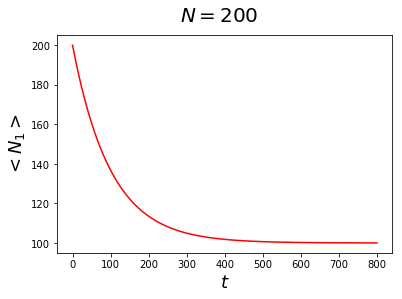

In [8]:
n = 200
n_0 = n
x = np.linspace(0, 4*n, 100)
y = (n_0 - n/2)*np.exp(-2*x/n) + n/2
plt.plot(x, y, color='red')
plt.ylabel('$ < N_1> $', fontsize=18)
plt.xlabel('$t$', fontsize=18)
plt.suptitle('$N= %d$' % n, fontsize=20)

plt.show()

## Asymptotic value of $ \langle N_1 (t) \rangle $ calculated directly by the equilibrium state: binomial distribution

Now we want to calculate 

$$ \langle N_1  \rangle  \equiv \lim_{t \rightarrow \infty} \langle N_1 (t) \rangle  $$

directly from the equilibrium state which follows a binomial probability distribution

$${\cal P }(N_1) = \frac{1}{2^N} \frac{N!}{N_1 ! (N - N_1)!}.$$

Hands-on:

$$ \langle N_1  \rangle  = \sum_{N_1=0}^{N} N_1 {\cal P }(N_1) $$

$$  \Rightarrow \langle N_1  \rangle =  \frac{1}{2^N} \sum_{N_1=0}^{N} N_1  \frac{N!}{N_1 ! (N - N_1)!} 
                                     =  \frac{1}{2^N} \sum_{N_1=1}^{N} N_1  \frac{N(N-1)!}{N_1 (N_1-1)! (N - N_1)!}
                                     =  \frac{N}{2^N} \sum_{N_1=1}^{N}   \frac{(N-1)!}{(N_1-1)!  ( (N-1) - (N_1-1) )!} .$$
                                     
With the change of variable $N_1^{'} = N_1 -1$, we have:

$$  \langle N_1  \rangle  = \frac{N}{2^N} \sum_{N_1=0}^{N-1} \frac{(N-1)!}{N_1!  ( (N-1) - N_1 )!}  =
                                \frac{N}{2^N} \sum_{N_1=0}^{N-1} \binom{N-1}{N_1}     .        $$
                                
From the binomial distribution normalization factor: 

$$ \sum_{N_1=0}^{N-1} \binom{N-1}{N_1} = {2^{N-1} }, $$

we get the result we were expecting:

$$ \langle N_1  \rangle =  \frac{N}{2}$$



## Asymptotic value of $ \langle N_{1}^{2} (t) \rangle $ and statistic fluctuations in the equilibrium

In order to analyze equilibrium statistic fluctuations,

$$ \propto \frac{\sqrt{\langle N_{1}^{2} \rangle - \langle N_{1} \rangle^2 }}{\langle N_{1} \rangle},$$ 

where $ \langle N_{1}^2  \rangle  \equiv \lim_{t \rightarrow \infty} \langle N_{1}^2\rangle  $, we now calculate the asymptotic value for the second moment directly from the binomial distribution, as it was done in the previous section.

$$ \langle N_{1}^2  \rangle  = \sum_{N_1=0}^{N} N_{1}^2 {\cal P }(N_1) $$

$$  \Rightarrow \langle N_{1}^2  \rangle =  \frac{1}{2^N} \sum_{N_1=0}^{N} N_{1}^2  \frac{N!}{N_1 ! (N - N_1)!} 
                                     =  \frac{1}{2^N} \sum_{N_1=1}^{N} N_{1}^2  \frac{N(N-1)!}{N_1 (N_1-1)! (N - N_1)!}
                                     =  \frac{N}{2^N} \sum_{N_1=1}^{N} N_{1}   \frac{(N-1)!}{(N_1-1)!((N-1)-(N_1-1) )!} .$$
                                     
With the change of variable $N_1^{'} = N_1 -1$, we have:

$$  \langle N_{1}^2  \rangle =   \frac{N}{2^N} \sum_{N_1=0}^{N-1} (N_{1}+1)  \frac{(N-1)!}{N_{1}!((N-1)-N_1 )!} 
                             = \frac{N}{2^N}  \left[  \sum_{N_1=0}^{N-1} N_{1}  \frac{(N-1)!}{N_{1}!((N-1)-N_1 )!}
                             + \sum_{N_1=0}^{N-1}   \frac{(N-1)!}{N_{1}!((N-1)-N_1 )!}\right]$$
                             
$$ \langle N_{1}^2  \rangle = \frac{N}{2^N}  \left[  \sum_{N_1=0}^{N-1} N_{1}  \binom{N-1}{N_1}
                             + \sum_{N_1=0}^{N-1}  \binom{N-1}{N_1}\right]  $$
                             
By the previous result for $\langle N_{1}  \rangle$ we infer that

$$  \sum_{N_1=0}^{N-1} N_{1}  \binom{N-1}{N_1} = 2^{N-2}(N-1)$$

and making use of the binomial distribution normalization factor, 

$$ \sum_{N_1=0}^{N-1} \binom{N-1}{N_1} = {2^{N-1} }, $$

we get

$$ \langle N_{1}^2  \rangle = \frac{N}{4}(N+1)  $$

Now that we have calculate the values $\langle N_{1}  \rangle$ and $\langle N_{1}^2  \rangle $, we note that for $t$ sufficiently large:

$$ \frac{\sqrt{\langle N_{1}^{2} \rangle - \langle N_{1} \rangle^2 }}{\langle N_{1} \rangle} = \frac{1}{\sqrt{N}} $$

Note that the fluctuation should go to zero as $ N \rightarrow \infty$.

